# Project 03 -  Sunspots Forecasting on Monthly Mean data

In [63]:
import pandas as pd
from prophet import Prophet
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score
from datetime import datetime, timedelta

In [64]:
#read and rename columns for monthly data
monthly_data = pd.read_csv('SN_m_tot_V2.0.csv', sep=';' , header=None)
monthly_data.columns= ['year', 'month', 'fractional_year', 'sunspot_number',
    'std_dev', 'observations', 'indicator']

In [65]:
print(monthly_data.head())

   year  month  fractional_year  sunspot_number  std_dev  observations  \
0  1749      1         1749.042            96.7     -1.0            -1   
1  1749      2         1749.123           104.3     -1.0            -1   
2  1749      3         1749.204           116.7     -1.0            -1   
3  1749      4         1749.288            92.8     -1.0            -1   
4  1749      5         1749.371           141.7     -1.0            -1   

   indicator  
0          1  
1          1  
2          1  
3          1  
4          1  


In [66]:
#data_preprocessing function to handle missing values and convert input format for prophet
def data_preprocessing(data, time_unit):
    #removing missing values -1
    data = data[data['sunspot_number']>=0]
    #convert to datetime
    if(time_unit== 'daily'):
        data['ds'] = pd.to_datetime(data[['year','month','day']])
    elif(time_unit== 'monthly'):
        data['ds'] = pd.to_datetime(data[['year', 'month']].assign(day=1))
    elif(time_unit== 'yearly'):
        #handling float value(mid-year date)
         # Convert fractional year to datetime directly inside this function
        def fractional_year_to_date(year):
            base_year = int(year)
            fraction = year - base_year
            # Approximate the fraction as days (365.25 days for leap year consideration)
            days = int(fraction * 365.25)
            return datetime(base_year, 1, 1) + timedelta(days=days)
        
        # Apply transformation for yearly time unit
        data['ds'] = data['year'].apply(fractional_year_to_date)
    #keep only required columns
    data=data[['ds','sunspot_number']].rename(columns={'sunspot_number':'y'})
    
    return data
    

In [67]:
monthly_clean = data_preprocessing(monthly_data, 'monthly')
monthly_clean.tail()

ds     y
3275 2021-12-01  67.5
3276 2022-01-01  54.0
3277 2022-02-01  59.7
3278 2022-03-01  78.5
3279 2022-04-01  84.1

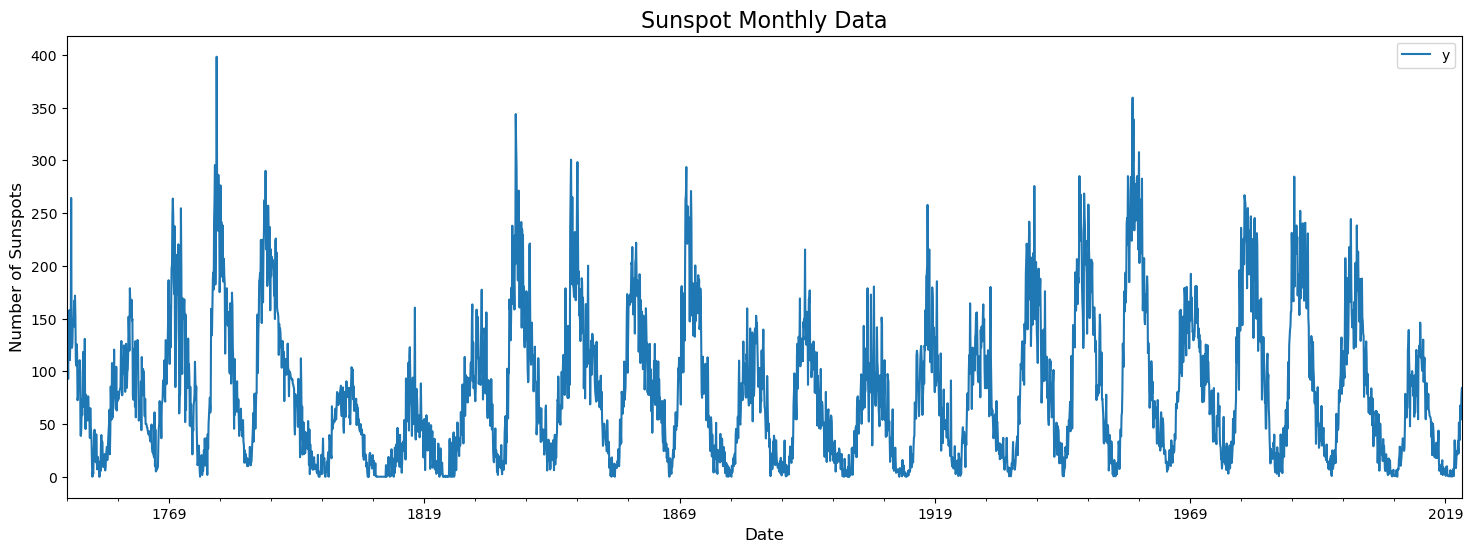

In [68]:
ay = monthly_clean.plot(x='ds', y= 'y', figsize=(18,6))
ay.set_title('Sunspot Monthly Data', fontsize=16)  # Add title with font size
ay.set_xlabel('Date', fontsize=12)  # Optional: Customize x-axis label
ay.set_ylabel('Number of Sunspots', fontsize=12)  # Optional: Customize y-axis label
plt.show()

In [69]:
len(monthly_clean)

3280

## Train, Test Split

In [71]:
split_point = int(len(monthly_clean) * 0.8)  # Calculate split index (80% train, 20% test)

# Train and Test Split
train = monthly_clean.iloc[:split_point]  # First 80% of the data
test = monthly_clean.iloc[split_point:]   # Last 20% of the data

## Making Predictions 9 months into the future

In [73]:
from prophet.plot import plot_plotly, plot_components_plotly

In [74]:
# Initialize Prophet model
model = Prophet()
model.fit(monthly_clean)  # Fit the model to the entire dataset

# Create a DataFrame for future predictions
future = model.make_future_dataframe(periods=9, freq='M')  # Extend 9 months into the future

# Forecast future values
forecast = model.predict(future)

14:42:58 - cmdstanpy - INFO - Chain [1] start processing
14:42:58 - cmdstanpy - INFO - Chain [1] done processing


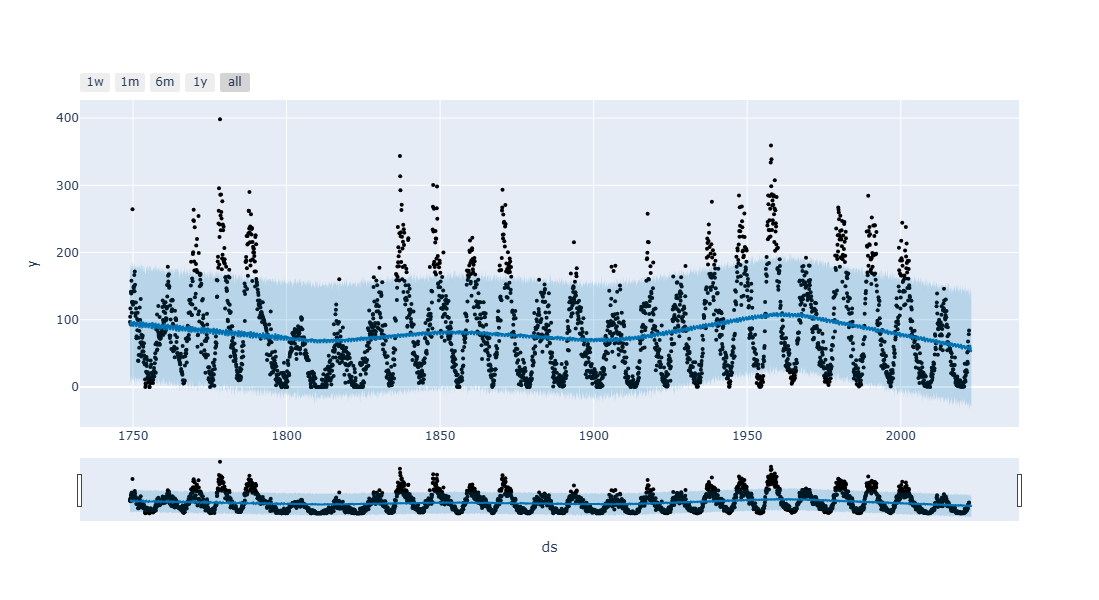

In [75]:
# Plot the forecast
plot_plotly(model ,forecast)

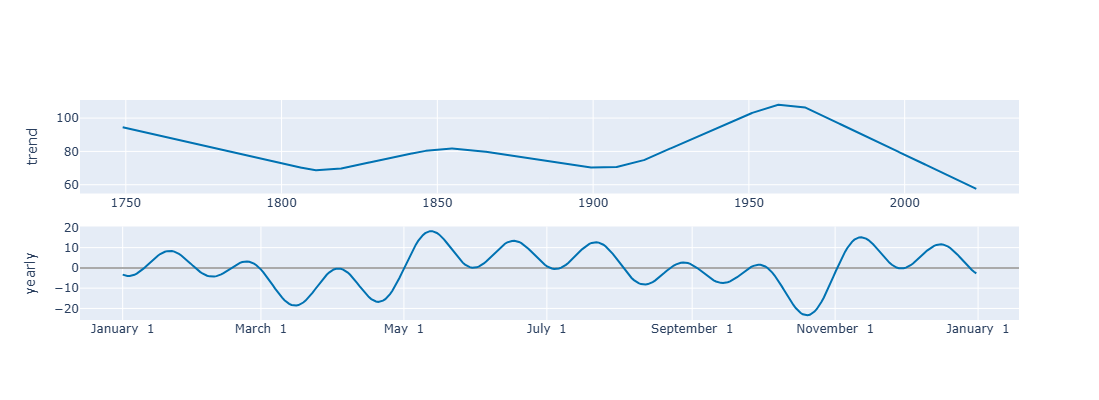

In [76]:
plot_components_plotly(model, forecast)

In [77]:
forecast.tail(9)

ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
3280 2022-04-30  58.138717  -35.260644  141.528420    58.138717    58.138717   
3281 2022-05-31  58.063238  -31.474647  132.381416    58.063238    58.063238   
3282 2022-06-30  57.990194  -21.678773  147.245004    57.990194    57.990194   
3283 2022-07-31  57.914716  -25.256031  144.762542    57.914716    57.914716   
3284 2022-08-31  57.839237  -30.124631  144.521360    57.839237    57.839237   
3285 2022-09-30  57.766193  -26.186932  142.244054    57.766193    57.766193   
3286 2022-10-31  57.690714  -28.467604  131.533235    57.690714    57.690714   
3287 2022-11-30  57.617670  -27.999608  148.291373    57.617670    57.617670   
3288 2022-12-31  57.542192  -28.612654  130.660859    57.542192    57.542192   

      additive_terms  additive_terms_lower  additive_terms_upper    yearly  \
3280       -3.383741             -3.383741             -3.383741 -3.383741   
3281        0.038516              0.038516              0.038516  0.038516   
3282        1.853524              1.853524              1.853524  1.853524   
3283        4.491652              4.491652              4.491652  4.491652   
3284        2.150085              2.150085              2.150085  2.150085   
3285        1.560508              1.560508              1.560508  1.560508   
3286       -5.682317             -5.682317             -5.682317 -5.682317   
3287       -0.285121             -0.285121             -0.285121 -0.285121   
3288       -2.320558             -2.320558             -2.320558 -2.320558   

      yearly_lower  yearly_upper  multiplicative_terms  \
3280     -3.383741     -3.383741                   0.0   
3281      0.038516      0.038516                   0.0   
3282      1.853524      1.853524                   0.0   
3283      4.491652      4.491652                   0.0   
3284      2.150085      2.150085                   0.0   
3285      1.560508      1.560508                   0.0   
3286     -5.682317     -5.682317                   0.0   
3287     -0.285121     -0.285121                   0.0   
3288     -2.320558     -2.320558                   0.0   

      multiplicative_terms_lower  multiplicative_terms_upper       yhat  
3280                         0.0                         0.0  54.754975  
3281                         0.0                         0.0  58.101754  
3282                         0.0                         0.0  59.843718  
3283                         0.0                         0.0  62.406368  
3284                         0.0                         0.0  59.989322  
3285                         0.0                         0.0  59.326701  
3286                         0.0                         0.0  52.008397  
3287                         0.0                         0.0  57.332549  
3288                         0.0                         0.0  55.221634

## Evaluate Predictions_1

In [79]:
# Train the model on training data
model = Prophet()
model.fit(train)

# Create a DataFrame for predictions on the test set
future_test = test[['ds']]  # Use test data dates for prediction
forecast_test = model.predict(future_test)

# Actual values
y_actual = test['y'].values

# Predicted values
y_pred = forecast_test['yhat'].values

# MAE
mae = mean_absolute_error(y_actual, y_pred)

# MAPE (Using Scikit-learn)
mape = mean_absolute_percentage_error(y_actual, y_pred) * 100  # Multiply by 100 to express as a percentage

# R² Score
r2 = r2_score(y_actual, y_pred)
# Print the results
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")
print(f"R² Score: {r2}")

14:43:00 - cmdstanpy - INFO - Chain [1] start processing
14:43:00 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error (MAE): 79.68835064079073
Mean Absolute Percentage Error (MAPE): 1.0489035260066933e+17%
R² Score: -0.723726206672199


## Making Predictions 9 months into the future with add_seasonality(fourier_order=3)

14:43:01 - cmdstanpy - INFO - Chain [1] start processing
14:43:01 - cmdstanpy - INFO - Chain [1] done processing


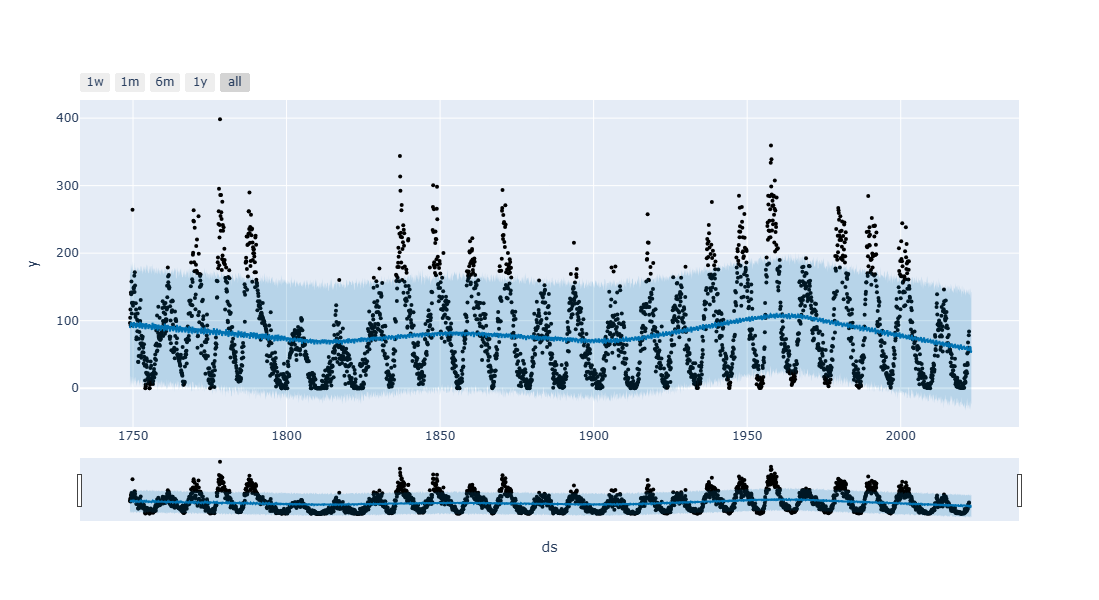

In [81]:
# Initialize the model
model = Prophet()

# Add custom seasonality for the 11-year solar cycle
# Period in months=11×12=132 months
# 'fourier_order' controls the complexity of the seasonality (higher values for more flexibility)
model.add_seasonality(name='solar_cycle', period=132, fourier_order=3)

# Fit the model
model.fit(monthly_clean)

# Forecast future dates
future = model.make_future_dataframe(periods=9, freq='M')
forecast = model.predict(future)

# Plot the forecast
plot_plotly(model ,forecast)


## Evaluate Predictions_add_seasonality(3)

In [107]:
# Initialize the model
model = Prophet()

# Add custom seasonality for the 11-year solar cycle
# 'fourier_order' controls the complexity of the seasonality (higher values for more flexibility)
model.add_seasonality(name='solar_cycle', period=132, fourier_order=3)

# Step 3: Fit the model on the training data
model.fit(train)

# Step 4: Make predictions for the test set
future_test = test[['ds']]  # Use test set dates for prediction
forecast_test = model.predict(future_test)

# Step 5: Extract actual and predicted values
y_actual = test['y'].values  # Actual sunspot counts
y_pred = forecast_test['yhat'].values  # Predicted sunspot counts

# Step 6: Calculate evaluation metrics
# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_actual, y_pred)

# Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_actual, y_pred) * 100  # Expressed as percentage

# R² Score
r2 = r2_score(y_actual, y_pred)

# Step 7: Print the results
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")
print(f"R² Score: {r2}")

17:02:43 - cmdstanpy - INFO - Chain [1] start processing
17:02:44 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error (MAE): 82.66218296734512
Mean Absolute Percentage Error (MAPE): 1.7176123980282304e+17%
R² Score: -1.7313573627409942


In [85]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Split the dataset into train and test sets
train = monthly_clean.iloc[:-365]  # Use all but the last year for training
test = monthly_clean.iloc[-365:]  # Last year for testing

# Function to evaluate predictions
def evaluate_forecast(y_actual, y_pred):
    # Filter out zero values in y_actual to avoid MAPE errors
    non_zero_mask = y_actual != 0
    y_actual_filtered = y_actual[non_zero_mask]
    y_pred_filtered = y_pred[non_zero_mask]
    
    mae = mean_absolute_error(y_actual_filtered, y_pred_filtered)
    mape = np.mean(np.abs((y_actual_filtered - y_pred_filtered) / y_actual_filtered)) * 100
    r2 = r2_score(y_actual_filtered, y_pred_filtered)
    
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
    print(f"R² Score: {r2:.4f}")
    return mae, mape, r2

# Iterate through different parameter combinations
growth_types = ['linear', 'logistic','flat']
changepoint_prior_scales = [0.05, 0.1]
n_changepoints_values = [10, 25]
fourier_orders = [5, 6]

# Initialize variables to store best metrics and configurations
best_mae = float('inf')
best_mape = float('inf')
best_r2 = float('-inf')

best_config_mae = None
best_config_mape = None
best_config_r2 = None

for growth in growth_types:
    for cps in changepoint_prior_scales:
        for n_changepoints in n_changepoints_values:
            for fourier_order in fourier_orders:
                print(f"\nTesting: growth={growth}, cps={cps}, n_changepoints={n_changepoints}, fourier_order={fourier_order}")
                
                # Initialize the model
                model = Prophet(
                    growth=growth,
                    changepoint_prior_scale=cps,
                    n_changepoints=n_changepoints
                )
                
                # Add custom seasonality
                model.add_seasonality(name='solar_cycle', period=132, fourier_order=fourier_order)
                
                # Add a cap for logistic growth (required if growth='logistic')
                if growth == 'logistic':
                    train['cap'] = 500  
                    test['cap'] = 500
                
                # Fit the model
                model.fit(train)
                
                # Forecast for test dates
                future = test[['ds']]
                if growth == 'logistic':
                    future['cap'] = 500  
                
                forecast = model.predict(future)
                
                # Evaluate the forecast
                y_actual = test['y'].values
                y_pred = forecast['yhat'].values
                mae, mape, r2 = evaluate_forecast(y_actual, y_pred)
                
                # Track the best configurations for each metric
                if mae < best_mae:
                    best_mae = mae
                    best_config_mae = (growth, cps, n_changepoints, fourier_order)
                
                if mape < best_mape:
                    best_mape = mape
                    best_config_mape = (growth, cps, n_changepoints, fourier_order)
                
                if r2 > best_r2:  # Higher R² is better
                    best_r2 = r2
                    best_config_r2 = (growth, cps, n_changepoints, fourier_order)

# Print the best configurations
print("\nBest Configuration for MAE:")
print(f"Growth: {best_config_mae[0]}, Changepoint Prior Scale: {best_config_mae[1]}, "
      f"n_changepoints: {best_config_mae[2]}, Fourier Order: {best_config_mae[3]}")
print(f"Best MAE: {best_mae}")

print("\nBest Configuration for MAPE:")
print(f"Growth: {best_config_mape[0]}, Changepoint Prior Scale: {best_config_mape[1]}, "
      f"n_changepoints: {best_config_mape[2]}, Fourier Order: {best_config_mape[3]}")
print(f"Best MAPE: {best_mape:.2f}%")

print("\nBest Configuration for R²:")
print(f"Growth: {best_config_r2[0]}, Changepoint Prior Scale: {best_config_r2[1]}, "
      f"n_changepoints: {best_config_r2[2]}, Fourier Order: {best_config_r2[3]}")
print(f"Best R² Score: {best_r2:.4f}")


Testing: growth=linear, cps=0.05, n_changepoints=10, fourier_order=5


14:43:04 - cmdstanpy - INFO - Chain [1] start processing
14:43:05 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error (MAE): 82.05342806030374
Mean Absolute Percentage Error (MAPE): 1929.91%
R² Score: -1.6952

Testing: growth=linear, cps=0.05, n_changepoints=10, fourier_order=6


14:43:05 - cmdstanpy - INFO - Chain [1] start processing
14:43:05 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error (MAE): 81.56324435227887
Mean Absolute Percentage Error (MAPE): 1918.39%
R² Score: -1.6639

Testing: growth=linear, cps=0.05, n_changepoints=25, fourier_order=5


14:43:06 - cmdstanpy - INFO - Chain [1] start processing
14:43:06 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error (MAE): 82.08621576742429
Mean Absolute Percentage Error (MAPE): 1929.88%
R² Score: -1.6972

Testing: growth=linear, cps=0.05, n_changepoints=25, fourier_order=6


14:43:07 - cmdstanpy - INFO - Chain [1] start processing
14:43:07 - cmdstanpy - INFO - Chain [1] done processing
14:43:07 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Error (MAE): 82.30356994731159
Mean Absolute Percentage Error (MAPE): 1934.44%
R² Score: -1.7110

Testing: growth=linear, cps=0.1, n_changepoints=10, fourier_order=5


14:43:08 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error (MAE): 82.63091769195763
Mean Absolute Percentage Error (MAPE): 1939.87%
R² Score: -1.7313

Testing: growth=linear, cps=0.1, n_changepoints=10, fourier_order=6


14:43:08 - cmdstanpy - INFO - Chain [1] start processing
14:43:09 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error (MAE): 80.52724779831397
Mean Absolute Percentage Error (MAPE): 1893.68%
R² Score: -1.5985

Testing: growth=linear, cps=0.1, n_changepoints=25, fourier_order=5


14:43:09 - cmdstanpy - INFO - Chain [1] start processing
14:43:10 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error (MAE): 81.93166400218519
Mean Absolute Percentage Error (MAPE): 1924.22%
R² Score: -1.6867

Testing: growth=linear, cps=0.1, n_changepoints=25, fourier_order=6


14:43:10 - cmdstanpy - INFO - Chain [1] start processing
14:43:11 - cmdstanpy - INFO - Chain [1] done processing
14:43:11 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Error (MAE): 81.5231261084021
Mean Absolute Percentage Error (MAPE): 1915.57%
R² Score: -1.6609

Testing: growth=logistic, cps=0.05, n_changepoints=10, fourier_order=5


14:43:12 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error (MAE): 65.78165826774216
Mean Absolute Percentage Error (MAPE): 1564.54%
R² Score: -0.7726

Testing: growth=logistic, cps=0.05, n_changepoints=10, fourier_order=6


14:43:21 - cmdstanpy - INFO - Chain [1] start processing
14:43:22 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error (MAE): 66.8031797118583
Mean Absolute Percentage Error (MAPE): 1590.10%
R² Score: -0.8256

Testing: growth=logistic, cps=0.05, n_changepoints=25, fourier_order=5


14:43:31 - cmdstanpy - INFO - Chain [1] start processing
14:43:32 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error (MAE): 67.86388111260958
Mean Absolute Percentage Error (MAPE): 1615.46%
R² Score: -0.8810

Testing: growth=logistic, cps=0.05, n_changepoints=25, fourier_order=6


14:43:41 - cmdstanpy - INFO - Chain [1] start processing
14:43:42 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error (MAE): 67.41536517557088
Mean Absolute Percentage Error (MAPE): 1604.19%
R² Score: -0.8574

Testing: growth=logistic, cps=0.1, n_changepoints=10, fourier_order=5


14:43:52 - cmdstanpy - INFO - Chain [1] start processing
14:43:53 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error (MAE): 77.58944065235292
Mean Absolute Percentage Error (MAPE): 1838.45%
R² Score: -1.4237

Testing: growth=logistic, cps=0.1, n_changepoints=10, fourier_order=6


14:44:02 - cmdstanpy - INFO - Chain [1] start processing
14:44:02 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error (MAE): 75.60768091783245
Mean Absolute Percentage Error (MAPE): 1795.08%
R² Score: -1.3086

Testing: growth=logistic, cps=0.1, n_changepoints=25, fourier_order=5


14:44:14 - cmdstanpy - INFO - Chain [1] start processing
14:44:15 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error (MAE): 75.61851479084687
Mean Absolute Percentage Error (MAPE): 1794.60%
R² Score: -1.3090

Testing: growth=logistic, cps=0.1, n_changepoints=25, fourier_order=6


14:44:28 - cmdstanpy - INFO - Chain [1] start processing
14:44:28 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error (MAE): 75.11697948725742
Mean Absolute Percentage Error (MAPE): 1783.40%
R² Score: -1.2803

Best Configuration for MAE:
Growth: logistic, Changepoint Prior Scale: 0.05, n_changepoints: 10, Fourier Order: 5
Best MAE: 65.78165826774216

Best Configuration for MAPE:
Growth: logistic, Changepoint Prior Scale: 0.05, n_changepoints: 10, Fourier Order: 5
Best MAPE: 1564.54%

Best Configuration for R²:
Growth: logistic, Changepoint Prior Scale: 0.05, n_changepoints: 10, Fourier Order: 5
Best R² Score: -0.7726


## Prediction with best configuration:

17:21:30 - cmdstanpy - INFO - Chain [1] start processing
17:21:30 - cmdstanpy - INFO - Chain [1] done processing


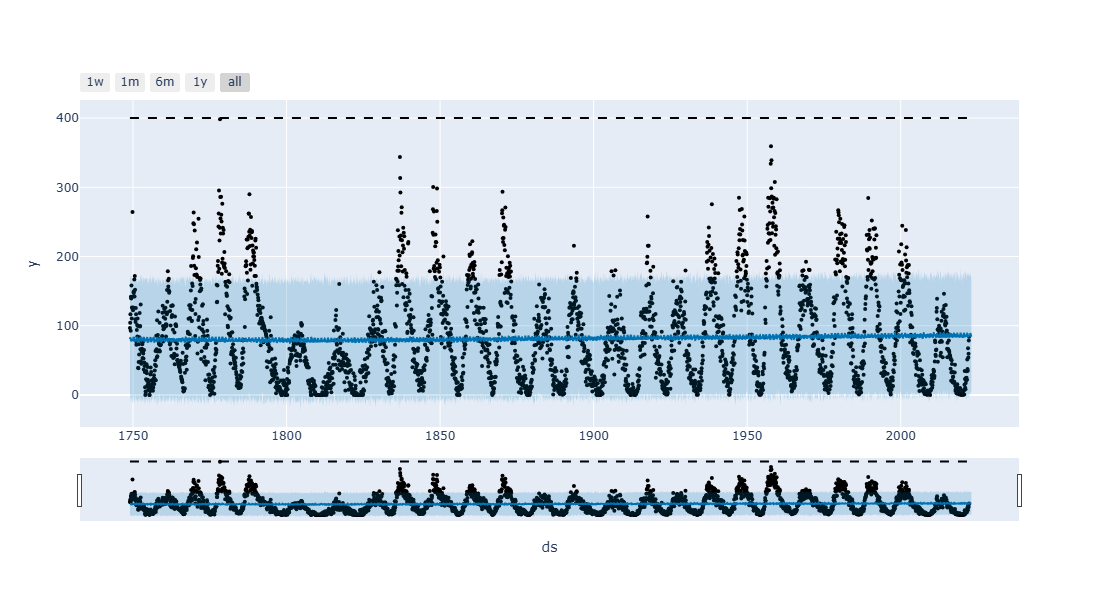

In [116]:
monthly_clean['cap'] = 400 

# Initialize the model
model = Prophet(
    growth='logistic',
    changepoint_prior_scale=0.05,
    n_changepoints=10
)
# Add seasonality for monthly data
model.add_seasonality(name='yearly', period=12, fourier_order=7)  # Yearly pattern
model.add_seasonality(name='half_yearly', period=6, fourier_order=6)  # Half-yearly pattern
model.add_seasonality(name='solar_cycle', period=132, fourier_order=6)  # Solar cycle (~11 years)

model.fit(monthly_clean)
# Forecast future dates
future = model.make_future_dataframe(periods=9, freq='M')
future['cap'] = 400

forecast = model.predict(future)

# Plot the forecast
plot_plotly(model ,forecast)


In [118]:
forecast.tail(9)

ds       trend  cap  yhat_lower  yhat_upper  trend_lower  \
3280 2022-04-30  174.818013  400    2.815223  171.500232   174.818013   
3281 2022-05-31  174.821054  400   -1.138199  170.255884   174.821053   
3282 2022-06-30  174.823997  400    1.531379  176.525404   174.823995   
3283 2022-07-31  174.827038  400    0.953194  171.369220   174.827034   
3284 2022-08-31  174.830080  400    8.151407  177.251446   174.830074   
3285 2022-09-30  174.833023  400   -4.346022  173.617511   174.833015   
3286 2022-10-31  174.836064  400    4.029583  172.736769   174.836055   
3287 2022-11-30  174.839007  400    4.667268  171.688268   174.838995   
3288 2022-12-31  174.842049  400    2.702306  169.418920   174.842033   

      trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
3280   174.818013      -88.830656            -88.830656            -88.830656   
3281   174.821053      -89.154254            -89.154254            -89.154254   
3282   174.823995      -89.971748            -89.971748            -89.971748   
3283   174.827034      -89.421748            -89.421748            -89.421748   
3284   174.830074      -85.518641            -85.518641            -85.518641   
3285   174.833015      -87.193467            -87.193467            -87.193467   
3286   174.836055      -87.182467            -87.182467            -87.182467   
3287   174.838995      -89.630078            -89.630078            -89.630078   
3288   174.842033      -90.806926            -90.806926            -90.806926   

      ...  solar_cycle  solar_cycle_lower  solar_cycle_upper    yearly  \
3280  ...     0.636199           0.636199           0.636199 -0.961639   
3281  ...    -0.980389          -0.980389          -0.980389  0.698123   
3282  ...    -0.115105          -0.115105          -0.115105 -0.984655   
3283  ...    -0.312983          -0.312983          -0.312983 -0.700018   
3284  ...     2.827384           2.827384           2.827384  0.778150   
3285  ...     3.247577           3.247577           3.247577 -1.316870   
3286  ...     2.336048           2.336048           2.336048 -0.676113   
3287  ...    -1.556679          -1.556679          -1.556679  0.769003   
3288  ...    -2.131722          -2.131722          -2.131722  0.134507   

      yearly_lower  yearly_upper  multiplicative_terms  \
3280     -0.961639     -0.961639                   0.0   
3281      0.698123      0.698123                   0.0   
3282     -0.984655     -0.984655                   0.0   
3283     -0.700018     -0.700018                   0.0   
3284      0.778150      0.778150                   0.0   
3285     -1.316870     -1.316870                   0.0   
3286     -0.676113     -0.676113                   0.0   
3287      0.769003      0.769003                   0.0   
3288      0.134507      0.134507                   0.0   

      multiplicative_terms_lower  multiplicative_terms_upper       yhat  
3280                         0.0                         0.0  85.987357  
3281                         0.0                         0.0  85.666800  
3282                         0.0                         0.0  84.852249  
3283                         0.0                         0.0  85.405291  
3284                         0.0                         0.0  89.311438  
3285                         0.0                         0.0  87.639556  
3286                         0.0                         0.0  87.653598  
3287                         0.0                         0.0  85.208929  
3288                         0.0                         0.0  84.035123  

[9 rows x 23 columns]